In [74]:
import csv
import numpy as np
import pandas as pd
import os
from subprocess import check_output
import matplotlib.pyplot as plt 
import scipy.stats as st
import seaborn as sns

csv_file = "City_of_Seattle_Wages_by_Department.csv"

sea_wage_df = pd.read_csv(csv_file)
sea_wage_df.head()

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,NaN,29.75,1.0,29.75,1,39.0,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,NaN,26.79,1,56.0,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,NaN,26.26,1,37.0,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,NaN,31.76,2,99.0,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.0,100.0,NaN


In [37]:
# filling a null values using fillna()  
sea_wage_df["No. Female Empl"].fillna(0, inplace = True)
sea_wage_df["No. Male Empl"].fillna(0, inplace = True)
sea_wage_df["Ratio of women's hourly rate to men's hourly rate - percentage"].fillna(0, inplace = True)
sea_wage_df["Female Avg Hrly Rate"].fillna(0, inplace = True)
sea_wage_df["Male Avg Hrly Rate"].fillna(0, inplace = True)
sea_wage_df["Department"].fillna(0, inplace = True)
sea_wage_df

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,0.00,0.0,29.75,1.0,29.75,1,39.00,0.0,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,0.00,0.0,26.79,1,56.00,0.0,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,0.00,0.0,26.26,1,37.00,0.0,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,0.00,0.0,31.76,2,99.00,0.0,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.00,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1642,Seattle Public Utilities,Wtrshed Resources Tech,0.00,0.0,34.45,1.0,34.45,1,73.00,0.0,No women in title
1643,Seattle Public Utilities,"Wtrworks Maint Spec,Sr-SMU",0.00,0.0,29.99,2.0,29.99,2,43.00,0.0,No women in title
1644,Seattle Public Utilities,Wtrworks Maint Spec-SMU,0.00,0.0,27.65,3.0,27.65,3,47.00,0.0,No women in title
1645,Seattle Public Utilities,Wtrworks Maint Supv,0.00,0.0,35.57,1.0,35.57,1,14.00,0.0,No women in title


In [20]:
number_employees_male = sea_wage_df.groupby("Department").agg({"No. Male Empl":"sum"})
number_employees_male

,No. Male Empl
Department,
0,6240.0
Arts and Cultural Affairs,8.0
City Auditor,2.0
City Budget Office,10.0
City Employees Retirement Syst,4.0
City Light,1169.0
Civil Service Commissions,5.0
Department of Planning & Dev,177.0
Dept of Finance & Admn Svc,272.0


In [25]:
chart_data = sea_wage_df.loc[sea_wage_df["Department"] == "City Light"]
chart_data

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate - percentage,Notes
39,City Light,Accountant,30.63,4.0,30.92,3.0,30.75,7,83.29,99.05,NaN
40,City Light,"Accountant,Prin",38.48,2.0,39.96,1.0,38.97,3,16.67,96.28,NaN
41,City Light,"Accountant,Sr",35.26,4.0,33.67,2.0,34.73,6,55.83,104.73,NaN
42,City Light,Act Exec,0.00,0.0,43.10,1.0,43.10,1,38.00,0.00,No women in title
43,City Light,Actg Tech I-BU,22.56,1.0,22.56,1.0,22.56,2,59.50,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
298,City Light,Util Hearing Ofcr,42.25,1.0,0.00,0.0,42.25,1,80.00,0.00,No men in title
299,City Light,Util Laborer,0.00,0.0,22.56,1.0,22.56,1,244.00,0.00,No women in title
300,City Light,"Warehouser,Chief",30.88,1.0,30.88,4.0,30.88,5,185.20,100.00,NaN
301,City Light,"Warehouser,Sr-BU",26.50,4.0,26.50,9.0,26.50,13,131.08,100.00,NaN


In [73]:
chart_data.count()
chart_data

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate - percentage,Notes
39,City Light,Accountant,30.63,4.0,30.92,3.0,30.75,7,83.29,99.05,NaN
40,City Light,"Accountant,Prin",38.48,2.0,39.96,1.0,38.97,3,16.67,96.28,NaN
41,City Light,"Accountant,Sr",35.26,4.0,33.67,2.0,34.73,6,55.83,104.73,NaN
42,City Light,Act Exec,0.00,0.0,43.10,1.0,43.10,1,38.00,0.00,No women in title
43,City Light,Actg Tech I-BU,22.56,1.0,22.56,1.0,22.56,2,59.50,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
298,City Light,Util Hearing Ofcr,42.25,1.0,0.00,0.0,42.25,1,80.00,0.00,No men in title
299,City Light,Util Laborer,0.00,0.0,22.56,1.0,22.56,1,244.00,0.00,No women in title
300,City Light,"Warehouser,Chief",30.88,1.0,30.88,4.0,30.88,5,185.20,100.00,NaN
301,City Light,"Warehouser,Sr-BU",26.50,4.0,26.50,9.0,26.50,13,131.08,100.00,NaN


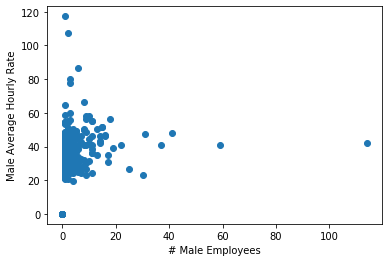

In [43]:
plt.scatter(chart_data['No. Male Empl'],chart_data['Male Avg Hrly Rate'])
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')
plt.show()

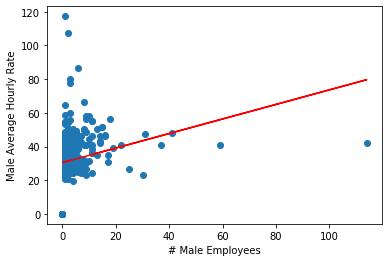

In [59]:


plt.scatter(chart_data['No. Male Empl'],chart_data['Male Avg Hrly Rate'])
plt.plot(chart_data['No. Male Empl'],y_values,color="red")
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')
plt.show()


In [ ]:
corr=round(st.pearsonr(chart_data['No. Male Empl'],chart_data['Male Avg Hrly Rate']) [0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(chart_data['No. Male Empl'],chart_data['Male Avg Hrly Rate'])
y_values = chart_data['No. Male Empl']*model[0]+model[1]
plt.scatter(chart_data['No. Male Empl'],chart_data['Male Avg Hrly Rate'])
plt.plot(chart_data['No. Male Empl'],y_values,color="red")
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')
plt.show()

In [11]:
city_light_totals = sea_wage_df.loc[sea_wage_df["Department"]]
citylightdata = city_light_totals.loc[city_light_totals['City Light']]                                    

C:\Users\18087\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


KeyError: 'City Light'

In [ ]:
city_light_totals = sea_wage_df.loc[sea_wage_df["Department"]]
citylightdata = city_light_totals.loc[city_light_totals['City Light']]
sea_wage_df.dropna( )

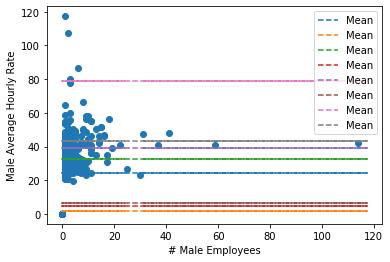

In [69]:
 y_mean = [np.mean(chart_data)]*len(chart_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(chart_data['No. Male Empl'],chart_data['Male Avg Hrly Rate'])


# Plot the avera
ge line
mean_line = ax.plot(chart_data['Male Avg Hrly Rate'],y_mean, label='Mean', linestyle='--')
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.show()